# Lecture 17: Chapter 9 Fourier Analysis, Part 1

## Exercise – Landau Section 9.1.2 #1: Fourier Series Summation (Sawtooth function)
- FourierMatplot.py is at
[this website](https://sites.science.oregonstate.edu/~landaur/Books/Codes/PythonCodes/)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## 9.1.2 Exercises: Fourier Series Summations

**Hint:** The program **FourierMatplot.py** written by Oscar Estrepe performs a Fourier analysis of a sawtooth function and produces the visualization shown on the right of Figure 9.1.  
You may want to use this program to help with this exercise.

### 1) Sawtooth function:  
Sum the Fourier series for the sawtooth function up to order $ N = 2, 4, 10, 20 $, and plot the results over two periods.

- **(a)** Check that in each case the series gives the mean value of the function at the points of discontinuity.  
- **(b)** Check that in each case the series overshoots by about 9% the value of the function on either side of the discontinuity (the Gibbs phenomenon).


The sawtooth function (Figure9.1 left) is described mathematically as

$$y(t) = \Biggl\{\begin{array}{cl}
            \frac{t}{T∕2}, for \space 0≤ t≤ \frac{T}{2}, \\
            \frac{t−T}{T∕2}, for \space \frac{T}{2} ≤ t≤ T. 
            \end{array}
            \tag{9.10}$$

 <span style="color: green;"> So first let's define the sawtooth function, when I wrote it as in the book eq and plotted it
I found it wasn't periodical, but stopped at T. So I decided to keep every t inside T. </span>

In [2]:
def Sawtooth(t,T):
    t = t % T  # to ensure periodicity

    if t < T/2 and t > 0:
        return t/(T/2)
    elif t < T and t > T/2:
        return (t-T)/(T/2)
    return 0

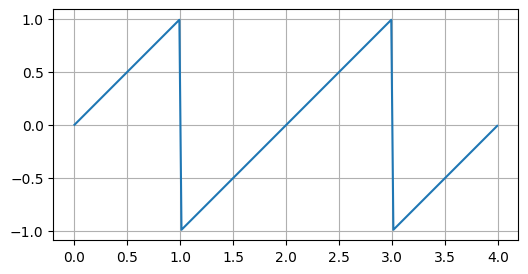

In [3]:
#plot the function
T = 2.                                                    # Period 
t = np.arange(0.0, 2*T, 0.01)
y = []
for i in t:
    y.append(Sawtooth(i,T))

plt.figure(figsize=(6, 3))
plt.plot(t,y)
plt.grid()
plt.show()


 <span style="color: green;"> Now we need to find the fourier series
 the book uses </span>
 $$
b_n = \frac{2}{T} \int_{-T/2}^{+T/2} \frac{t}{T/2} \sin(n\omega t) \, dt = \frac{2}{n\pi} (-1)^{n+1} \tag{9.12}
$$

$$
y(t) = \sum_{n=1}^{N} \frac{2}{n\pi} (-1)^{n+1} \sin(n\omega t)
$$

where $ \omega = \frac{2\pi}{T} $.



In [4]:
def FourST(N, T, t):
    """ Computes the Fourier series for a sawtooth wave using the book's formula """
    sumy = np.zeros_like(t)  # Initialize sum
    omega = 2.0 * np.pi / T  # Fundamental frequency

    n_values = np.arange(1, N + 1)  
    b_n_values = (2 / (n_values * np.pi)) * (-1) ** (n_values + 1)  # coefficients

    # Sum the Fourier series
    for n, bn in zip(n_values, b_n_values):
        sumy += bn * np.sin(n * omega * t)

    return sumy, n_values, b_n_values

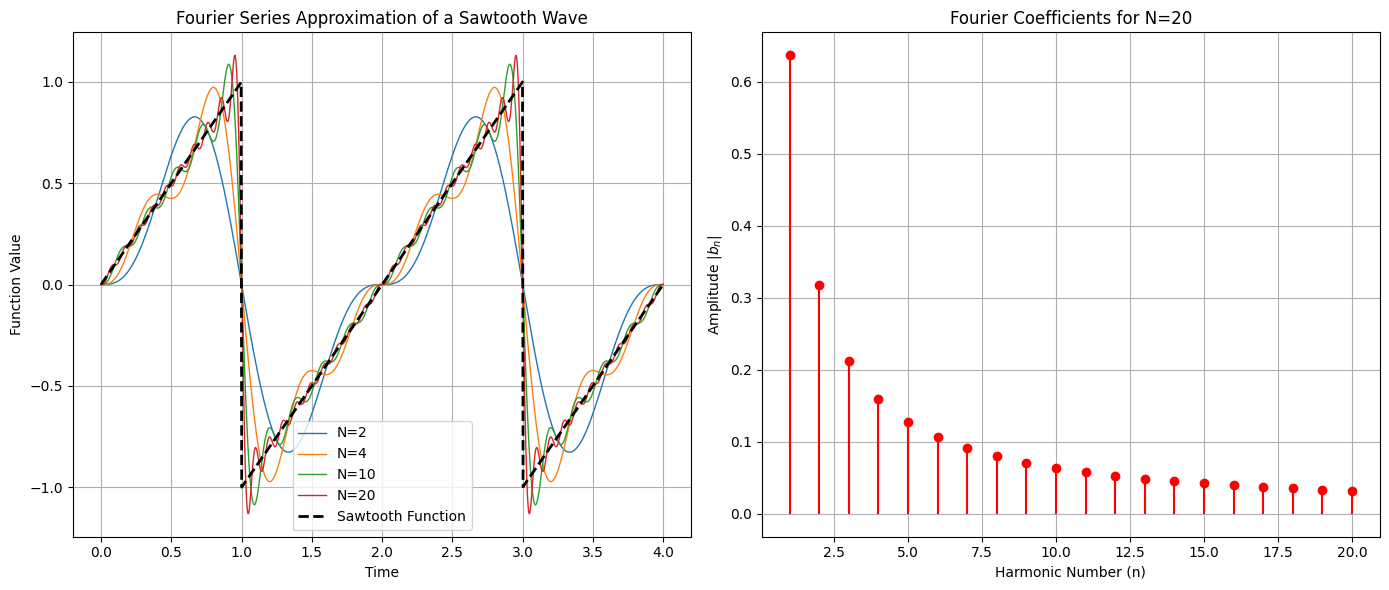

In [5]:

# Define the time range and period
T = 2.0  # Period
t = np.linspace(0, 2*T, 1000) 

# Compute sawtooth function
sawtooth_values = [Sawtooth(i, T) for i in t]

# Define different N values for Fourier approximations
N_values = [2, 4, 10, 20]
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ------------------ (1) Fourier Series Approximation ------------------
for N in N_values:
    fourier_values, _, _ = FourST(N, T, t)  # Get Fourier series values
    axes[0].plot(t, fourier_values, label=f'N={N}', linewidth=1)

# Plot sawtooth function
axes[0].plot(t, sawtooth_values, 'k--', label="Sawtooth Function", linewidth=2)
axes[0].set_title("Fourier Series Approximation of a Sawtooth Wave")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Function Value")
axes[0].legend()
axes[0].grid()

# ------------------ (2) Fourier Frequencies ------------------
N_max = max(N_values)
_, n_values, b_n_values = FourST(N_max, T, t) 
axes[1].stem(n_values, np.abs(b_n_values), basefmt=" ", linefmt="r-", markerfmt="ro")

axes[1].set_title(f"Fourier Coefficients for N={N_max}")
axes[1].set_xlabel("Harmonic Number (n)")
axes[1].set_ylabel(r"Amplitude $|b_n|$")
axes[1].grid()

plt.tight_layout()
plt.show()


<span style="color: green;"> **a)** From the graph, we can tell that the discontinuity happens at 1 and 3, which correspond to $T/2$ and $3T/2$.  
The mean of the function is 0. First, I want to see what the evaluated function gives. Then, I will approach the discontinuity from the left and the right as in:

$$
f_{\text{Fourier}}(t_0) = \frac{1}{2} \left[ \lim_{t \to t_0^-} f(t) + \lim_{t \to t_0^+} f(t) \right]
$$

</span>


In [6]:
np.mean(sawtooth_values)

np.float64(-1.4210854715202004e-17)

In [7]:
T = 2.0  # Period
N_values = [2, 4, 10, 20]   # Order of Fourier series

# Compute the Fourier series at the discontinuity t = T/2
t_discontinuity = T / 2

for N in N_values:
    fourier_value = FourST(N, T, np.array([t_discontinuity]))

# Compute expected mean value (should be 0)
left_limit = Sawtooth(t_discontinuity - 1e-6, T)
right_limit = Sawtooth(t_discontinuity + 1e-6, T)
mean_value = (left_limit + right_limit) / 2

print(f"Expected mean value: {mean_value:.6e}")

for N in N_values:
    fourier_value = FourST(N, T, np.array([t_discontinuity]))[0][0]
    print(f"N={N}: Fourier series value at discontinuity = {fourier_value:.6e}")



Expected mean value: -5.551115e-17
N=2: Fourier series value at discontinuity = 1.559269e-16
N=4: Fourier series value at discontinuity = 3.118537e-16
N=10: Fourier series value at discontinuity = 7.796344e-16
N=20: Fourier series value at discontinuity = 1.727679e-15


<span style="color: green;"> The values get further from 0 as N grows, but they are practically 0. I wonder if this is a float precision thing. </span>

In [8]:
t_near_discontinuity = np.linspace(t_discontinuity - 0.2, t_discontinuity + 0.2, 500)

expected_overshoot = 1.09
print(f"overshoot: {expected_overshoot:.6f}\n")

# Check Gibbs phenomenon for each N
for N in N_values:
    fourier_near, _, _  = FourST(N, T, t_near_discontinuity)

    max_value_near_discontinuity = np.max(fourier_near)

    print(f"N={N}: Maximum Fourier series value near discontinuity = {max_value_near_discontinuity:.6f}")

    # Check if it approximately matches the expected Gibbs overshoot
    overshoot_percentage = ((max_value_near_discontinuity - 1) / 1) * 100
    print(f"Overshoot percentage: {overshoot_percentage:.2f}%")

overshoot: 1.090000

N=2: Maximum Fourier series value near discontinuity = 0.676926
Overshoot percentage: -32.31%
N=4: Maximum Fourier series value near discontinuity = 0.972296
Overshoot percentage: -2.77%
N=10: Maximum Fourier series value near discontinuity = 1.086692
Overshoot percentage: 8.67%
N=20: Maximum Fourier series value near discontinuity = 1.130980
Overshoot percentage: 13.10%


## Exercise - Landau Section 9.1.2 #2: Fourier Series Summation (Half-wave function)


2) Half-wave function: Sum the Fourier series for the half-wave function up to order
N = 2, 4, 10, 20, and plot the results over two periods. (The series converges quite well,
doesn’t it?)

In [9]:
def Halfwave(t, omega): #ω = 2π/T
    T = 2*np.pi/omega
    t = t % T  # to ensure periodicity
    if t > 0 and t < T/2:
        return np.sin(omega*t)
    else:
        return 0

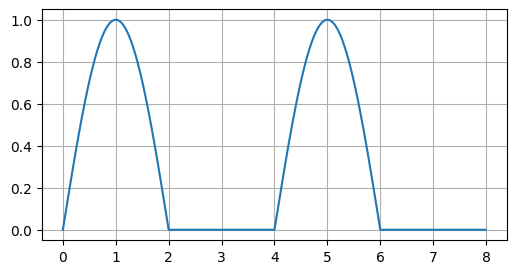

In [10]:
omega = 0.5 * np.pi      
T = 2*np.pi/omega
t = np.arange(0.0, 2*T, 0.01)
y = []
for i in t:
    y.append(Halfwave(i,omega))

plt.figure(figsize=(6, 3))
plt.plot(t,y)
plt.grid()
plt.show()

In [11]:
def FourHW(N, omega, t):
    """ Computes the Fourier series for a half-wave wave using the book's formula """
    sumy = np.zeros_like(t)  # Initialize sum

    n_values = np.arange(2, N + 1)  
    # coefficients
    a_n_values = -2 / (np.pi * (n_values**2 - 1))
    
    # Sum the Fourier series
    for n, an in zip(n_values, a_n_values):
        if n % 2 == 0:
            sumy += an * np.cos(n * omega * t) # Even 
        else:
            sumy += 0 # Odd
        
    sumy += 0.5 * np.sin(omega * t)
    return sumy, n_values, a_n_values

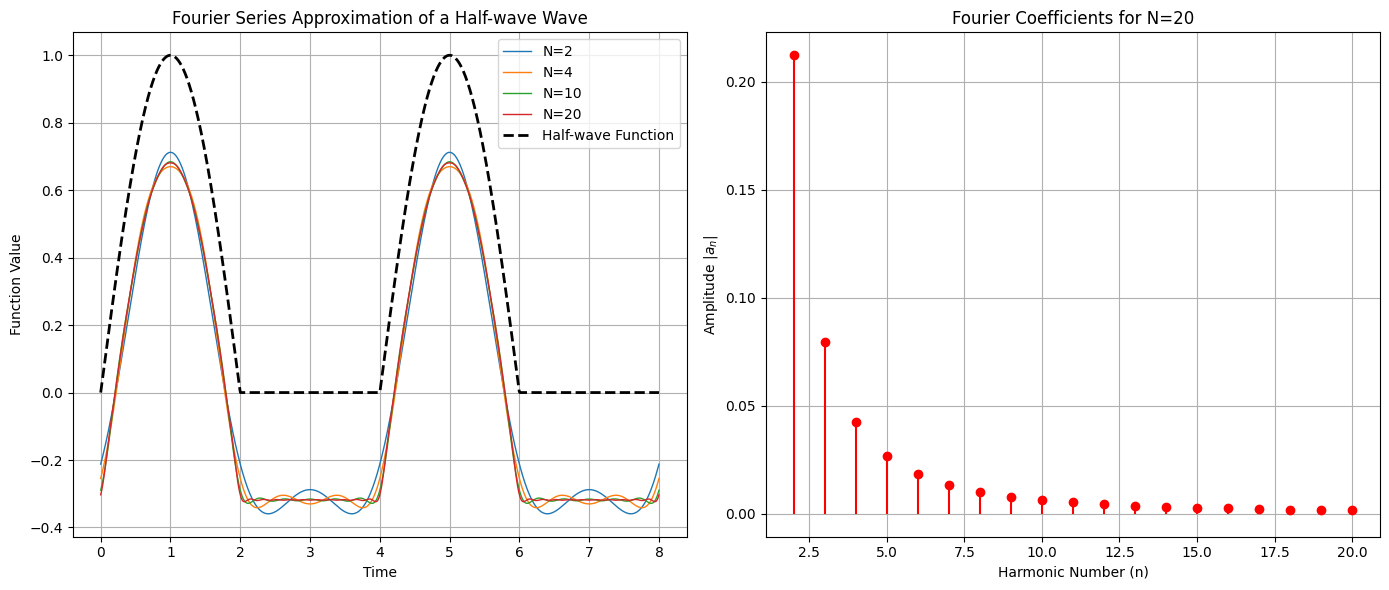

In [12]:

# Define the time range and period
omega = 0.5 * np.pi      
T = 2*np.pi/omega
t = np.linspace(0, 2*T, 1000) 

# Compute sawtooth function
halfwave_values = [Halfwave(i,omega) for i in t]

# Define different N values for Fourier approximations
N_values = [2, 4, 10, 20]
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ------------------ (1) Fourier Series Approximation ------------------
for N in N_values:
    fourier_values, _, _ = FourHW(N, omega, t)  # Get Fourier series values
    axes[0].plot(t, fourier_values, label=f'N={N}', linewidth=1)

# Plot sawtooth function
axes[0].plot(t, halfwave_values, 'k--', label="Half-wave Function", linewidth=2)
axes[0].set_title("Fourier Series Approximation of a Half-wave Wave")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Function Value")
axes[0].legend()
axes[0].grid()

# ------------------ (2) Fourier Frequencies ------------------
N_max = max(N_values)
_, n_values, a_n_values = FourHW(N_max, omega, t) 
axes[1].stem(n_values, np.abs(a_n_values), basefmt=" ", linefmt="r-", markerfmt="ro")

axes[1].set_title(f"Fourier Coefficients for N={N_max}")
axes[1].set_xlabel("Harmonic Number (n)")
axes[1].set_ylabel(r"Amplitude $|a_n|$")
axes[1].grid()

plt.tight_layout()
plt.show()


## Exercise – Landau Section 9.3.1 #1: Aliasing
- `DFTcomplex.py` code from Code Listing 9.1 can be found on VPython code
website in Getting Started module.

1) The sampling of a signal by DFT for only a finite number of times not only limits  
the accuracy of the deduced high-frequency components, but also contaminates the  
deduced low-frequency components (aliasing). Consider the two functions sin(𝜋t∕2) and  
sin(2𝜋t) for 0 ≤ t ≤ 8.

    (a) Make graphs of both functions on the same plot.  
    (b) Perform a DFT on both functions.  
    (c) Sample at times t = 0, 2, 4, 6, 8,… and draw conclusions.  
    (d) Sample at times t = 0, 12∕10, 4∕3,… and draw conclusions about the high-frequency  
        components (Hint: They may be aliased by the low-frequency components).  
    (e) The Nyquist criterion states that when a signal containing frequency f is sampled at  
        rate s = N∕T, measurements per unit time, with s ≤ f∕2, then aliasing occurs.  
        Verify specifically that the frequencies f and f − 2s yield the same DFT.

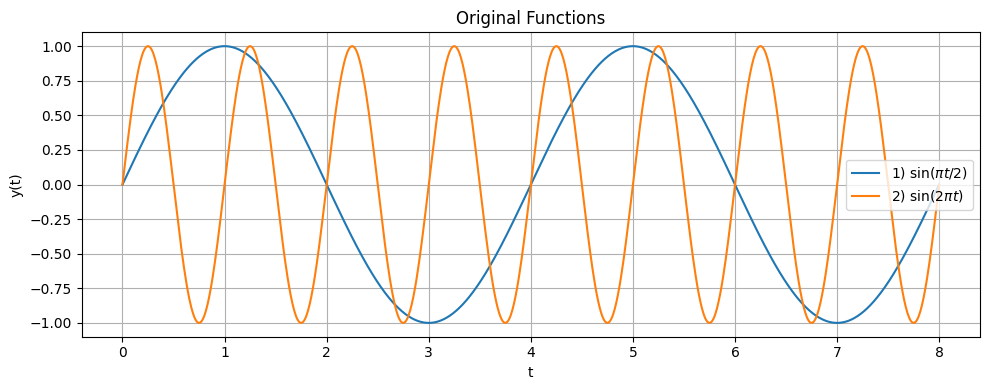

In [13]:
t = np.linspace(0, 8, 1000)
y1 = np.sin(np.pi * t / 2)
y2 = np.sin(2 * np.pi * t)

plt.figure(figsize=(10, 4))
plt.plot(t, y1, label=r'1) sin($\pi t / 2$)')
plt.plot(t, y2, label=r'2) sin($2\pi t$)')
plt.title("Original Functions")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
# Constants and array declarations
N = 100
twopi = 2.0 * np.pi
sq2pi = 1.0 / np.sqrt(twopi)

Ycomplex = np.zeros(N, dtype=complex)

# Perform the Discrete Fourier Transform
def DFT(y, Ycomplex):
    for n in range(N):
        zsum = complex(0.0, 0.0)
        for k in range(N):
            zexpo = complex(0, twopi * k * n / N)
            zsum += y[k] * np.exp(-zexpo)
        Ycomplex[n] = zsum * sq2pi
    return Ycomplex


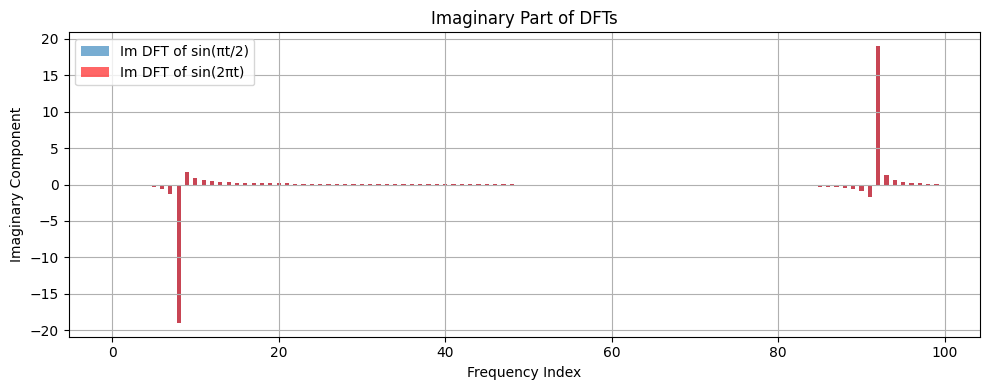

In [15]:
# Define the two signals
def signal1(t): return np.sin(np.pi * t / 2)
def signal2(t): return np.sin(2 * np.pi * t)

# Sampling parameters
t = np.linspace(0, 8, 100)  # Uniform sampling over [0, 8]

# Sample the signals
y1 = signal1(t)
y2 = signal2(t)

# Perform DFT
Y1 = DFT(y1,Ycomplex)
Y2 = DFT(y2,Ycomplex)

# Plot imaginary parts of the DFTs
plt.figure(figsize=(10, 4))
plt.bar(range(len(Y1)), [val.imag for val in Y1], width=0.5, label='Im DFT of sin(πt/2)', alpha=0.6)
plt.bar(range(len(Y2)), [val.imag for val in Y2], width=0.5, label='Im DFT of sin(2πt)', alpha=0.6, color='red')
plt.title("Imaginary Part of DFTs")
plt.xlabel("Frequency Index")
plt.ylabel("Imaginary Component")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

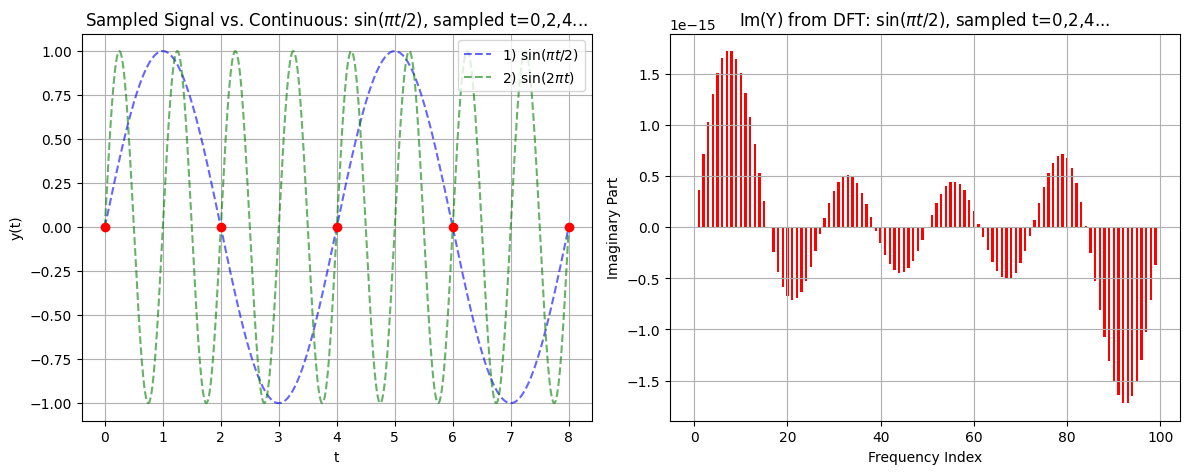

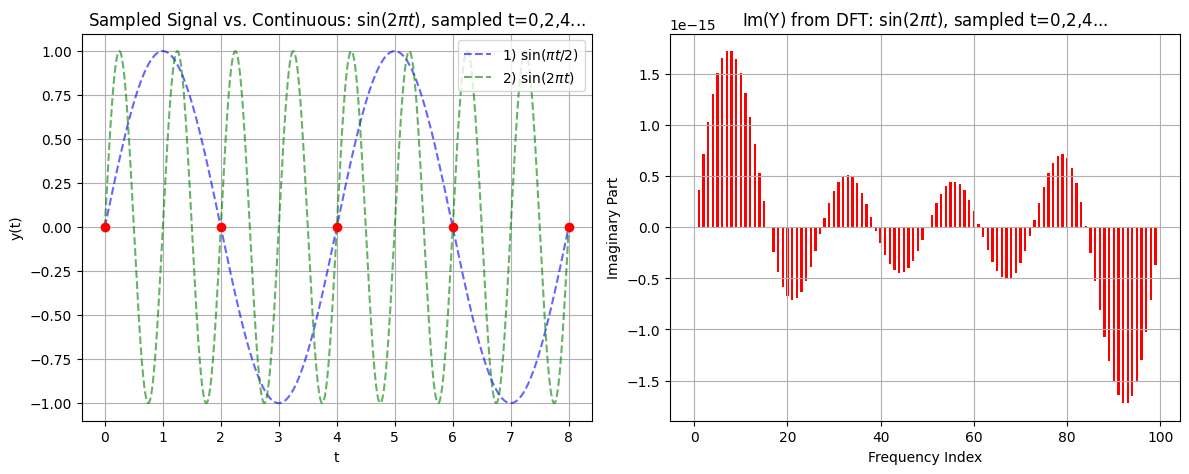

In [16]:
#(c) Sample at t = 0, 2, 4, 6, 8 
t_c = np.arange(0, 9, 2)  
# Evaluate
y1_c = signal1(t_c)
y2_c = signal2(t_c)

# Pad to N+1 to match DFT input size
y1_c_pad = np.zeros(N + 1)
y2_c_pad = np.zeros(N + 1)
y1_c_pad[:len(t_c)] = y1_c
y2_c_pad[:len(t_c)] = y2_c

# DFT
Y1_c = DFT(y1_c_pad, Ycomplex)
Y2_c = DFT(y2_c_pad, Ycomplex)

# Plot results
def plot_dft(t, y, Y, label):
    t_cont = np.linspace(0, 8, 1000) 
    y1_cont = signal1(t_cont)
    y2_cont = signal2(t_cont)

    plt.figure(figsize=(12, 5))

    # --- First subplot: Sampled vs. Continuous signals ---
    plt.subplot(1, 2, 1)
    plt.plot(t_cont, y1_cont, linestyle="dashed", color="blue", alpha=0.6, label=r'1) sin($\pi t / 2$)')
    plt.plot(t_cont, y2_cont, linestyle="dashed", color="green", alpha=0.6, label=r'2) sin($2\pi t$)')
    plt.stem(t, y, basefmt=" ", linefmt='r-', markerfmt='ro')
    plt.title(f"Sampled Signal vs. Continuous: {label}")
    plt.xlabel("t")
    plt.ylabel("y(t)")
    plt.legend(loc="upper right")
    plt.grid(True)

    # --- Second subplot: Imaginary part of DFT ---
    plt.subplot(1, 2, 2)
    plt.bar(range(len(Y)), [val.imag for val in Y], color='red', width=0.5)
    plt.title(f"Im(Y) from DFT: {label}")
    plt.xlabel("Frequency Index")
    plt.ylabel("Imaginary Part")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_dft(t_c, y1_c, Y1_c, r"$\sin(\pi t / 2)$, sampled t=0,2,4...")
plot_dft(t_c, y2_c, Y2_c, r"$\sin(2\pi t)$, sampled t=0,2,4...")

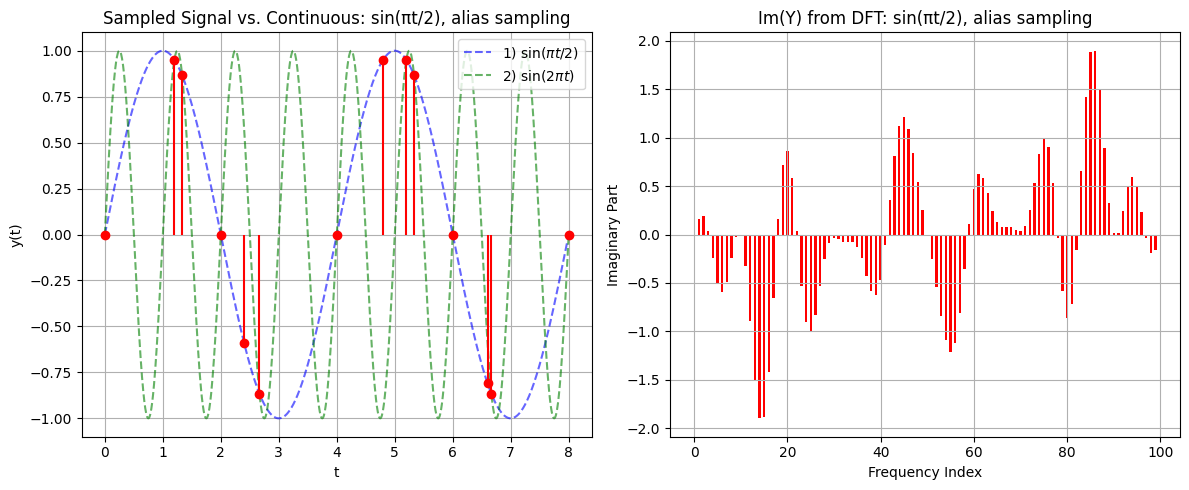

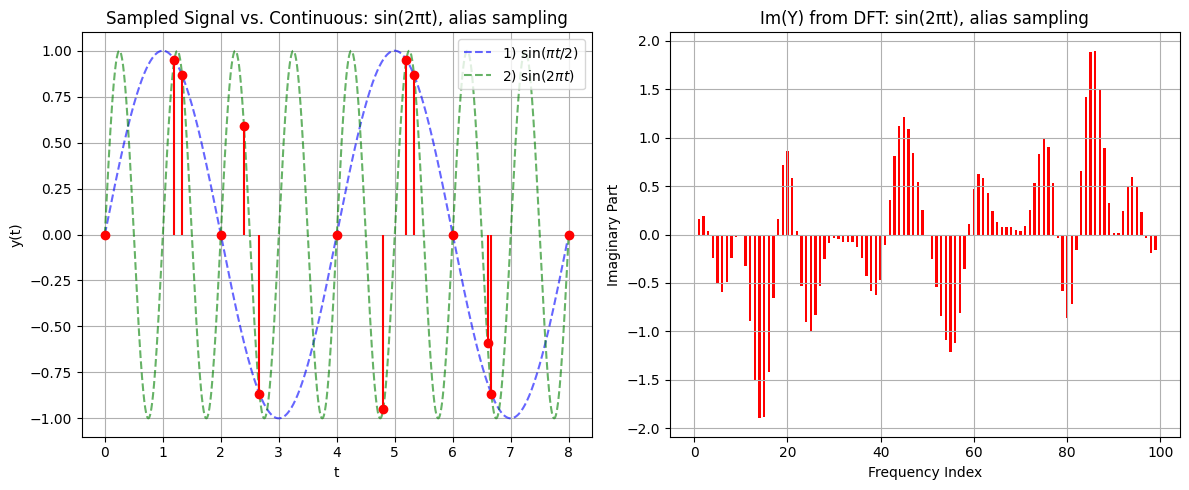

In [17]:
# (d) Sample at t = 0, 12/10, 4/3, ...,
t_d = np.array([
    0, 1.2, 4/3, 2, 2.4, 8/3, 4, 4.8, 
    5.2, 16/3, 6, 6.6, 20/3, 8
])
y1_d = signal1(t_d)
y2_d = signal2(t_d)

# Pad to N+1
y1_d_pad = np.zeros(N + 1)
y2_d_pad = np.zeros(N + 1)
y1_d_pad[:len(t_d)] = y1_d
y2_d_pad[:len(t_d)] = y2_d

Y1_d = DFT(y1_d_pad, Ycomplex)
Y2_d = DFT(y2_d_pad, Ycomplex)

plot_dft(t_d, y1_d, Y1_d, "sin(πt/2), alias sampling")
plot_dft(t_d, y2_d, Y2_d, "sin(2πt), alias sampling")

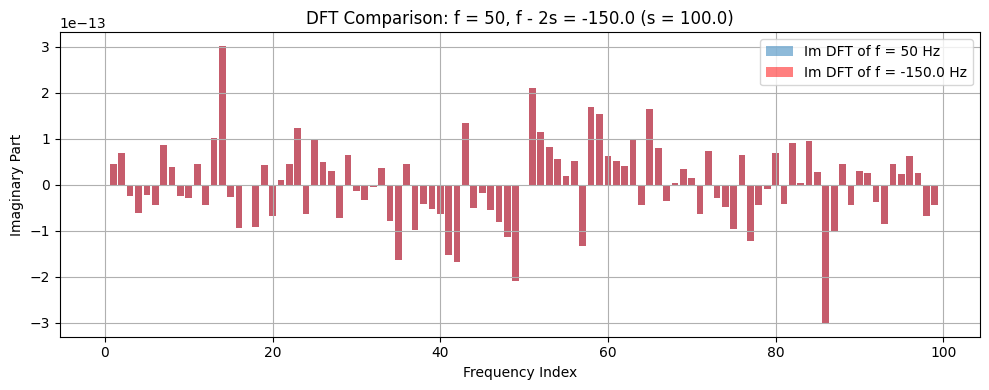

In [18]:
def nyquist_test(f_original, duration=1.0):
    s = N / duration  # Sample rate (samples per unit time)
    f_alias = f_original - 2 * s

    t = np.linspace(0, duration, N + 1)

    y_f = np.sin(2 * np.pi * f_original * t)
    y_alias = np.sin(2 * np.pi * f_alias * t)

    Y_f = DFT(y_f, Ycomplex)
    Y_alias = DFT(y_alias, Ycomplex)

    # Plot comparison
    plt.figure(figsize=(10, 4))
    plt.bar(range(N), [y.imag for y in Y_f], alpha=0.5, label=f"Im DFT of f = {f_original} Hz")
    plt.bar(range(N), [y.imag for y in Y_alias], alpha=0.5, label=f"Im DFT of f = {f_alias} Hz", color='red')
    plt.title(f"DFT Comparison: f = {f_original}, f - 2s = {f_alias} (s = {s})")
    plt.xlabel("Frequency Index")
    plt.ylabel("Imaginary Part")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

nyquist_test(f_original=50)


2) Perform a Fourier analysis of the chirp signal y(t) = sin(60t²). As seen in Figure 10.5,  
   this signal is not truly periodic, and is better analyzed with methods soon to be discussed.


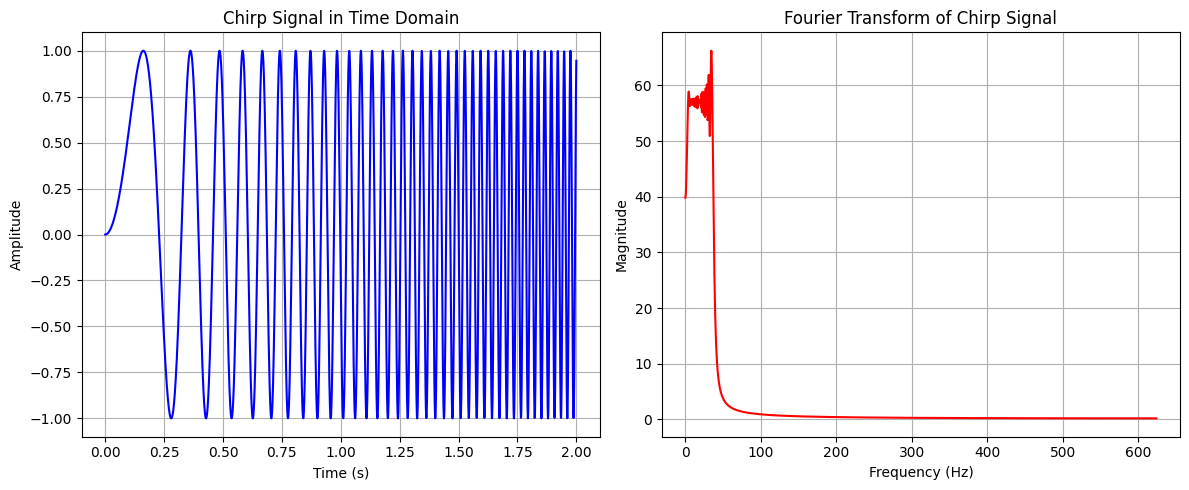

In [19]:
N = 2500
t = np.linspace(0, 2, N) 

Ycomplex = np.zeros(N, dtype=complex)

# Chirp Signal
def chirp_signal(t):
    return np.sin(60 * t**2)

# Compute Signal
y = chirp_signal(t)

# Compute DFT
Y = DFT(y,Ycomplex)

# Frequency Axis
freqs = np.fft.fftfreq(N, d=t[1] - t[0])

plt.figure(figsize=(12, 5))

# Time Domain
plt.subplot(1, 2, 1)
plt.plot(t, y, color='blue', label=r"$y(t) = \sin(60t^2)$")
plt.title("Chirp Signal in Time Domain")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

# Frequency Domain
plt.subplot(1, 2, 2)
plt.plot(freqs[:N // 2], np.abs(Y[:N // 2]), color='red')
plt.title("Fourier Transform of Chirp Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)

plt.tight_layout()
plt.show()

## Exercise - Landau Section 9.3.2 #1: Sample analytic input


Simple analytic input: It is always good to do simple checks before examining more complex problems, even if you are using a package’s Fourier tool.

1) **Sample the even signal**  
   $$y(t) = 3\cos(\omega t) + 2\cos(3\omega t) + \cos(5\omega t) \tag{9.40}$$

   (a) Decompose this into its components.  
   (b) Check that the components are essentially real and in the ratio 3:2:1 (or 9:4:1 for the power spectrum).  
   (c) Verify that the frequencies have the expected values (not just ratios).  
   (d) Verify the components sum up to give the input signal.  
   (e) Experiment on the separate effects of picking different values of the step size $ h $ and enlarging the measurement period $ T = Nh $.


<span style="color: green;">
My first approach to this problem is to write eq (9.40) as a function per term. In which I can later add as many $cos(\omega t)$ as I need. Then provide a frequency and a range of times to evaluate the function for each term and add them up to get a signal. This is a synthetic signal so we can follow the steps a) to e) easily then we can take that signal assume we know nothing about it and do fourier analysis on it too.
</span>

In [20]:
def signalTerms_builder(omega,t,A=1,n=1):
    return A * np.cos(n * omega * t)

In [21]:
omega = 0.5 * np.pi
h = 0.01  # Sampling frequency
N = 2000   # Number of samples
T = N*h  #measurment period
t = np.arange(0.0, T, 0.01)

In [22]:
# build term 1
term1 = signalTerms_builder(omega,t,3,1)

# build term 2
term2 = signalTerms_builder(omega,t,2,3)

# build term 3
term3 = signalTerms_builder(omega,t,1,5)

signal_components = [term1,term2,term3] #for now

In [23]:
#check they are real
if np.all(np.isreal(term1)) and np.all(np.isreal(term2)) and np.all(np.isreal(term3)):
    print('All good')
else:
    print('Complex!')

All good


In [24]:
# check ratios
amplitudes = []
for term in signal_components:
    amplitudes.append(np.max(np.abs(term)))

amplitudes = np.array(amplitudes)  # Convert to NumPy array to use powers on each element 

amplitude_ratios = amplitudes / amplitudes[2]
print("Normalized amplitude ratio:", amplitude_ratios)

powers = amplitudes**2
print("Normalized power ratio:", powers / amplitudes[2]**2)

Normalized amplitude ratio: [3. 2. 1.]
Normalized power ratio: [9. 4. 1.]


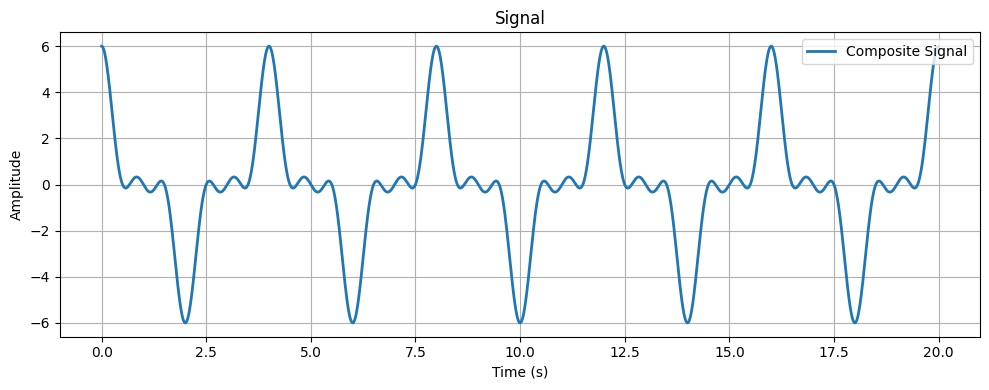

In [25]:
signal = term1+term2+term3
plt.figure(figsize=(10, 4))
plt.plot(t, signal, label='Composite Signal', linewidth=2)
plt.title("Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

<span style="color: green;">
Ok that's all good, but now lets asume that we don't know the signal components explicitly but just have that graph above.

That is, a bunch of data, variable `signal` alone. Let's do a) through e) again with fourier.

If we take the fourier transform of `signal` we will get the magnitudes and frequencies present in it. from there we can pick the most relevant ones
</span>

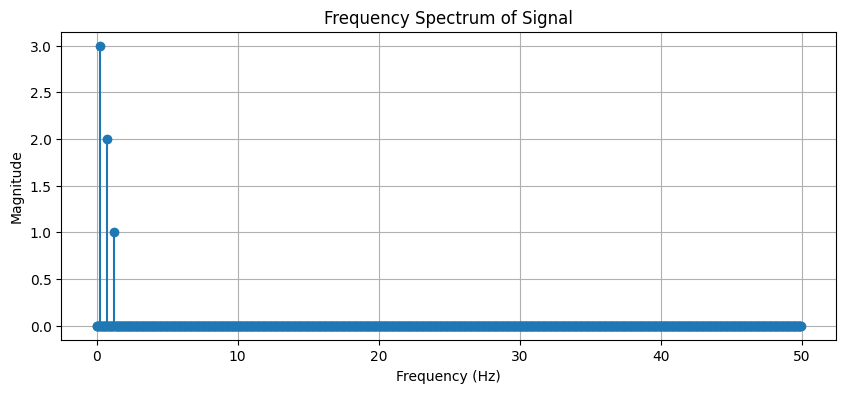

In [26]:
# FFT
fs = 1 / h
fft_result = np.fft.fft(signal)
fft_freqs = np.fft.fftfreq(N, d=1/fs)
fft_magnitude = np.abs(fft_result[:N//2]) / N
fft_magnitude[1:] *= 2
fft_freqs = fft_freqs[:N//2]

plt.figure(figsize=(10, 4))
plt.stem(fft_freqs, fft_magnitude, basefmt=" ")
plt.title("Frequency Spectrum of Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

<span style="color: green;">
a) the components of our signal would then be all magnitude values or amplitudes in the plot.

b) then we can check whether there's imaginary parts in the fourier transform (by the plot I suspect no)
</span>

In [27]:
if np.allclose(signal.imag, 0):
    print("Signal is real-valued.")


Signal is real-valued.


<span style="color: green;">
from the plot we can see the 3 peaks so those are the frequencies we want. So we can get the amplitudes (magnitude) and check their ratios and power ratios.

Let me zoom in in that plot again I suspect 1.5 should be enough.
</span>

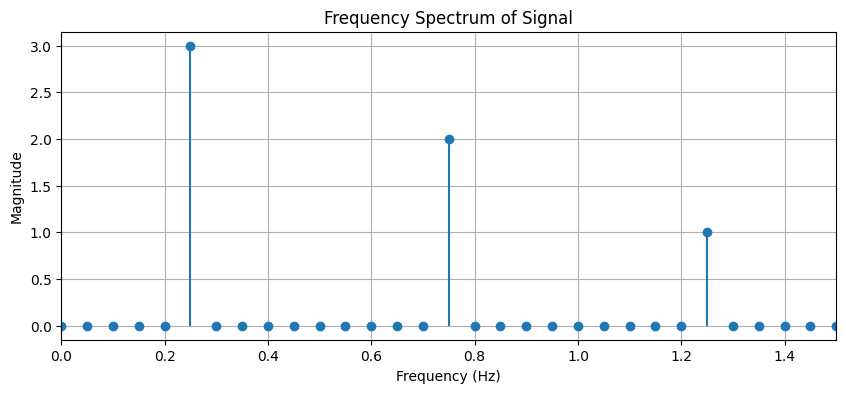

In [28]:
plt.figure(figsize=(10, 4))
plt.stem(fft_freqs, fft_magnitude, basefmt=" ")
plt.title("Frequency Spectrum of Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(0,1.5)
plt.grid(True)
plt.show()

In [29]:
target_freqs = [0.25, 0.75, 1.25]
amps = []

for f_target in target_freqs:
    idx = np.argmin(np.abs(fft_freqs - f_target))
    amps.append(fft_magnitude[idx])
    print(f"Peak near {f_target} Hz → {fft_freqs[idx]:.4f} Hz, amplitude = {fft_magnitude[idx]:.4f}")

amps = np.array(amps)

print("Amplitude ratio:", amps / amps[-1])
print("Power ratio:", (amps**2) / amps[-1]**2)

Peak near 0.25 Hz → 0.2500 Hz, amplitude = 3.0000
Peak near 0.75 Hz → 0.7500 Hz, amplitude = 2.0000
Peak near 1.25 Hz → 1.2500 Hz, amplitude = 1.0000
Amplitude ratio: [3. 2. 1.]
Power ratio: [9. 4. 1.]


<span style="color: green;">
Using those frequencies and amplitudes we can test in a common cosine function
</span>

In [30]:
reconstructed = np.zeros_like(t)
for f, A in zip(target_freqs, amps):
    reconstructed += A * np.cos(2 * np.pi * f * t)

error = np.max(np.abs(signal - reconstructed))
print("Max reconstruction error:", error)


Max reconstruction error: 8.881784197001252e-16


<span style="color: green;">
so thats a really small error, I think we can say that the reconstructed signal from the 3 main frequncies is good enough for d)
    Now let's generalize my steps in functions to test e) in a for loop
</span>

In [31]:
def build_signal_from_components(t, omega, components):
    """
    t: time vector
    omega: base angular frequency
    components: list of (A, n) tuples
    """
    signal = np.zeros_like(t)
    for A, n in components:
        signal += signalTerms_builder(omega, t, A, n)
    return signal

def analyze_signal(signal_fn, T=2.0, h=0.01):
    """
    signal_fn: a function of time t that returns a signal
    T: total time (measurement period)
    h: time step (sampling interval)
    """
    t = np.arange(0, T, h)
    fs = 1 / h
    N = len(t)

    signal = signal_fn(t)

    # FFT
    fft_result = np.fft.fft(signal)
    fft_freqs = np.fft.fftfreq(N, d=1/fs)
    fft_magnitude = np.abs(fft_result[:N//2]) / N
    fft_magnitude[1:] *= 2
    fft_freqs = fft_freqs[:N//2]

    return t, signal, fft_freqs, fft_magnitude

def plot_spectrum(fft_freqs, fft_magnitude, title="Frequency Spectrum", xlim=None):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(8, 4))
    plt.stem(fft_freqs, fft_magnitude, basefmt=" ")
    plt.title(title)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    if xlim is not None:
        plt.xlim(xlim)  # Expecting a tuple like (0, 2)
    plt.tight_layout()
    plt.show()

<span style="color: green;">
Now lets test my functions and see if i get the same graph from the above
</span>

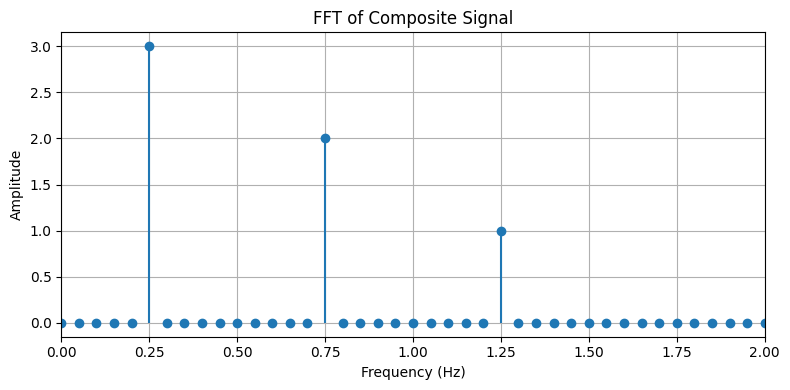

In [32]:
omega = 0.5 * np.pi
components = [(3, 1), (2, 3), (1, 5)]  # Format: (amplitude, harmonic_multiplier)

signal_fn = lambda t: build_signal_from_components(t, omega, components)
t, signal, fft_freqs, fft_magnitude = analyze_signal(signal_fn, T=20, h=0.01)

plot_spectrum(fft_freqs, fft_magnitude, title="FFT of Composite Signal",xlim=(0, 2))


<span style="color: green;">
Now that it is working in can loop for different h and plot to see whats happening in a couple of lines
</span>

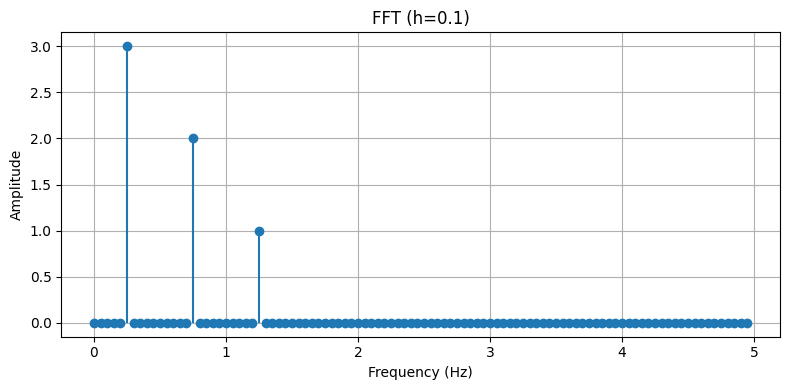

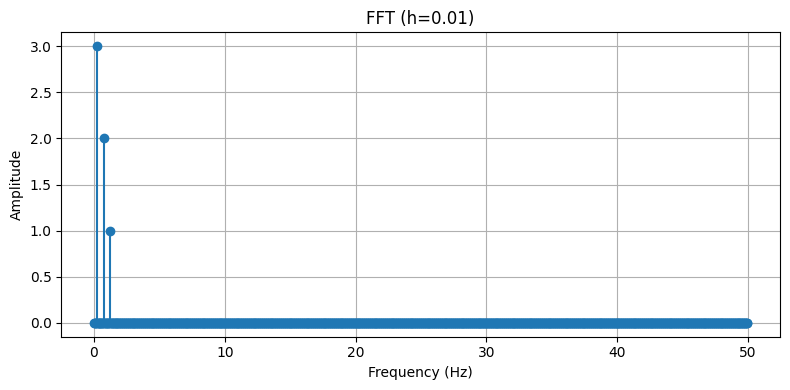

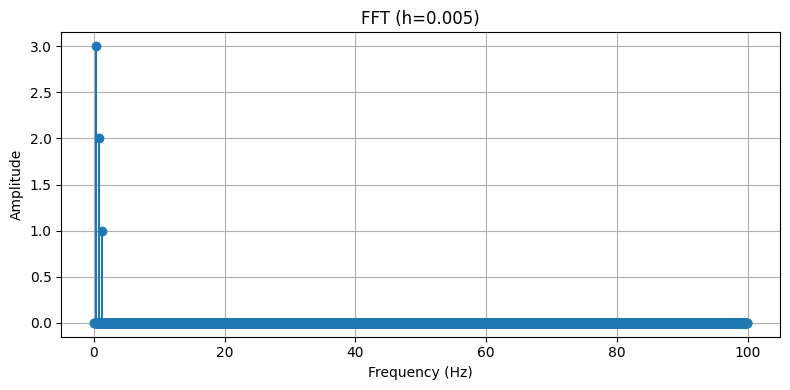

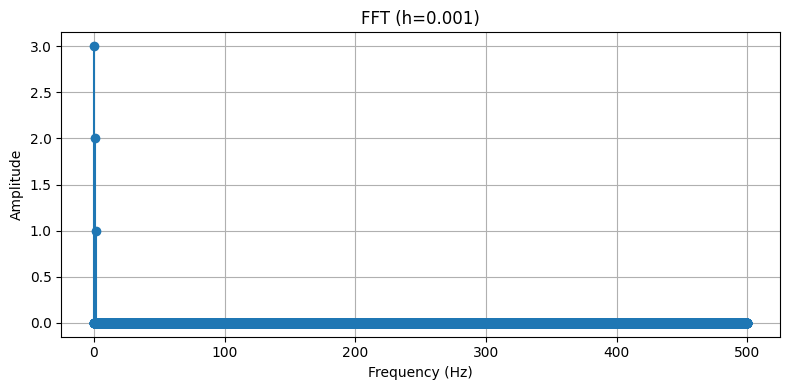

In [33]:
omega = 0.5 * np.pi
components = [(3, 1), (2, 3), (1, 5)]  # Format: (amplitude, harmonic_multiplier)

for h in [0.1, 0.01, 0.005, 0.001]:
    signal_fn = lambda t: build_signal_from_components(t, omega, components)
    t, signal, fft_freqs, fft_magnitude = analyze_signal(signal_fn, T=20, h=h)
    plot_spectrum(fft_freqs, fft_magnitude, title=f"FFT (h={h})")

<span style="color: green;">
we are sampling way more than needed but the dominant frequencies are still the same for each of this graphs 
</span>

## Exercise - Landau Section 9.3.2 #4: Sample analytic input


4) **Sample the signal**  
   $$y(t) = 5 + 10\sin(t + 2)$$

   Compare and explain the results obtained by sampling (a) without the 5, (b) as given but without the 2, (c) without the 5 and the 2.



In [34]:
def og_signal(t):
    return 5 + 10 * np.sin(t + 2)
    
def signal_a(t):
    return 10 * np.sin(t + 2)

def signal_b(t):
    return 5 + 10 * np.sin(t)

def signal_c(t):
    return 10 * np.sin(t)


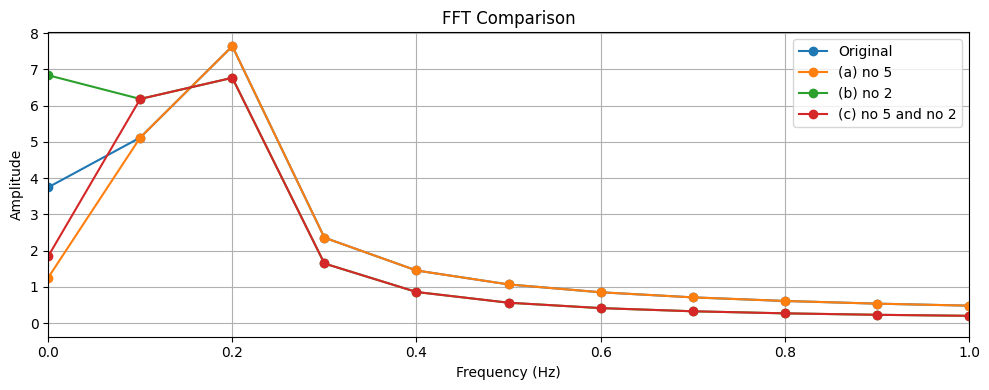

In [35]:
T = 10
h = 0.01

labels = ['Original', '(a) no 5', '(b) no 2', '(c) no 5 and no 2']
fns = [og_signal, signal_a, signal_b, signal_c]

plt.figure(figsize=(10, 4))

for label, fn in zip(labels, fns):
    t, signal, fft_freqs, fft_magnitude = analyze_signal(fn, T=T, h=h)
    plt.plot(fft_freqs, fft_magnitude, label=label, marker='o')

plt.title("FFT Comparison")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.xlim(0, 1)
plt.tight_layout()
plt.show()



## Exercise – Landau Section 9.3.2: Highly nonlinear oscillator


Highly nonlinear oscillator: Recall the numerical solution for oscillations of a spring with power p = 12 [see (9.1)]. Decompose the solution into a Fourier series and determine the number of higher harmonics that contribute at least 10%; for example, determine the n for which |bₙ / b₁| < 0.1. Check that resuming the components reproduces the signal.

<div style="color: green;">
The potential in 9.1 is: 

$$
V(x) = \frac{1}{p} k |x|^p
$$

And we can take p = 12

and the eq of motion is:
$$
\ddot{x} = -k\, \text{sgn}(x) \, |x|^{p - 1}
$$

</div>


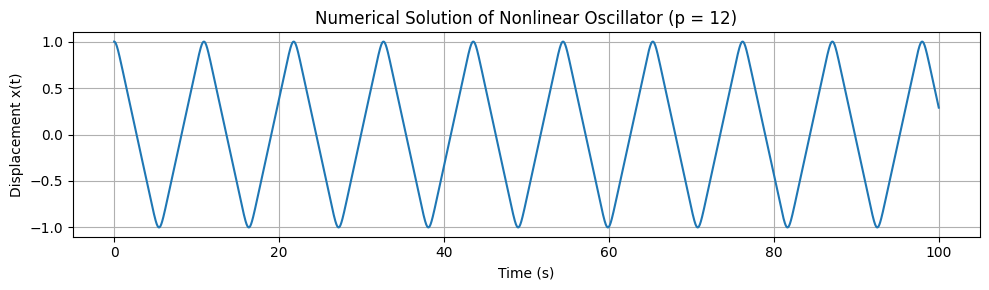

In [36]:
# Differential equation: dx/dt = v, dv/dt = -k |x|^(p-2) x
def nonlinear_oscillator(t, y, p=12, k=1):
    x, v = y #arry of the form [x0, v0]
    acc = -k * np.sign(x) * np.abs(x)**(p - 1)
    return [v, acc]


def solve_nonlinear_oscillator(p=12, k=1, T=100, h=0.01, x0=1.0, v0=0.0):
    from scipy.integrate import solve_ivp
    t_eval = np.arange(0, T, h)
    sol = solve_ivp(lambda t, y: nonlinear_oscillator(t, y, p, k), #solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, rtol=1e-3)
                    (0, T), [x0, v0], t_eval=t_eval, rtol=1e-8)
    return sol.t, sol.y[0]

# Parameters
p = 12
k = 1
T = 100
h = 0.01
x0 = 1.0
v0 = 0.0
#modify if needed

# Solve using solve_nonlinear_oscillator
t, x = solve_nonlinear_oscillator(p,k,T,h,x0,v0)

plt.figure(figsize=(10, 3))
plt.plot(t, x)
plt.title(f"Numerical Solution of Nonlinear Oscillator (p = {p})")
plt.xlabel("Time (s)")
plt.ylabel("Displacement x(t)")
plt.grid(True)
plt.tight_layout()
plt.show()



In [37]:
def analyze_nonlinear_oscillator_fft(p=12, T=100, h=0.01, T_ss=10):
    t, x = solve_nonlinear_oscillator(p=p, T=T, h=h)
    start_idx = int(len(t) - T_ss / h)
    t_ss = t[start_idx:]
    x_ss = x[start_idx:]

    # Inject as signal_fn (even though t not used)
    signal_fn = lambda _: x_ss
    t_dummy, _, fft_freqs, fft_magnitude = analyze_signal(signal_fn, T_ss, h)

    return t_ss, x_ss, fft_freqs, fft_magnitude

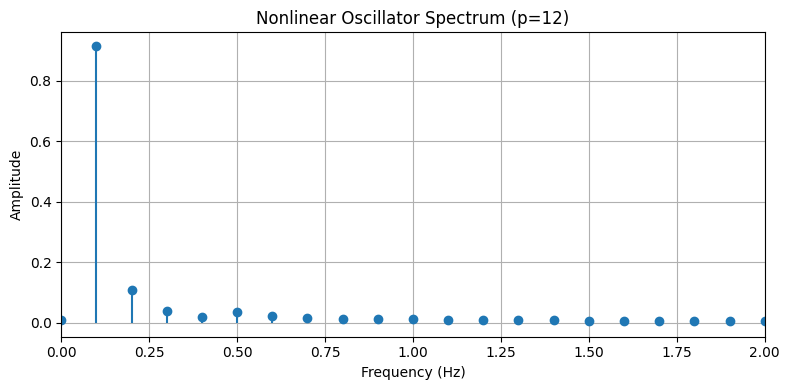

In [38]:
t_ss, x_ss, fft_freqs, fft_magnitude = analyze_nonlinear_oscillator_fft(p=12, T=100, h=0.01, T_ss=10)
plot_spectrum(fft_freqs, fft_magnitude, title="Nonlinear Oscillator Spectrum (p=12)", xlim=(0, 2))

In [39]:
# Ignore DC component at index 0
b1 = np.max(fft_magnitude[1:])  # assume b1 is the dominant frequency

# Normalize all harmonics to b1
ratios = fft_magnitude / b1

# Find first index n where ratio < 0.1 (ignoring DC)
threshold = 0.1
valid_ratios = ratios[1:]  # exclude DC
n_cut = np.argmax(valid_ratios < threshold) + 1  # shift index since we skipped DC

print(f"First harmonic n where |b_n / b_1| < 0.1: n = {n_cut}")

#top 5
for i in range(1, n_cut + 3):
    print(f"n = {i}, b_n = {fft_magnitude[i]:.5f}, |b_n / b1| = {ratios[i]:.3f}")


First harmonic n where |b_n / b_1| < 0.1: n = 3
n = 1, b_n = 0.91380, |b_n / b1| = 1.000
n = 2, b_n = 0.10784, |b_n / b1| = 0.118
n = 3, b_n = 0.03866, |b_n / b1| = 0.042
n = 4, b_n = 0.01800, |b_n / b1| = 0.020
n = 5, b_n = 0.03445, |b_n / b1| = 0.038


In [40]:
def reconstruct_signal_from_fft(x_ss, n_cut):
    N = len(x_ss)
    fft_result = np.fft.fft(x_ss)
    fft_full = np.zeros(N, dtype=complex)
    fft_full[:n_cut] = fft_result[:n_cut]
    fft_full[-n_cut+1:] = np.conj(fft_result[1:n_cut][::-1])
    return np.fft.ifft(fft_full).real

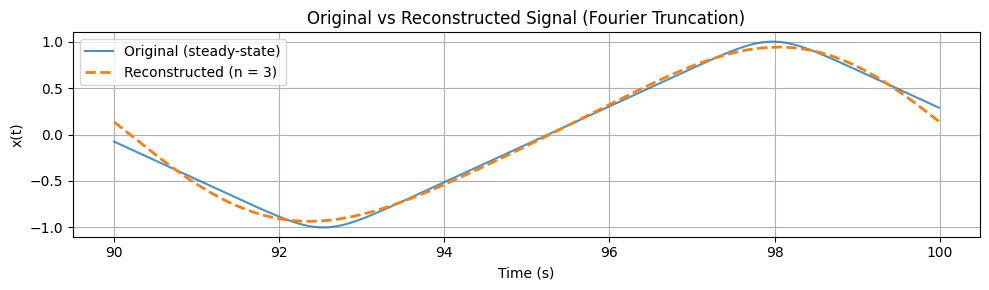

In [41]:
reconstructed = reconstruct_signal_from_fft(x_ss, n_cut)

plt.figure(figsize=(10, 3))
plt.plot(t_ss, x_ss, label='Original (steady-state)', alpha=0.8)
plt.plot(t_ss, reconstructed, '--', label=f'Reconstructed (n = {n_cut})', linewidth=2)
plt.title("Original vs Reconstructed Signal (Fourier Truncation)")
plt.xlabel("Time (s)")
plt.ylabel("x(t)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## (Grad Students) Exercise - Landau Section 9.4.2 #1: Autocorrelation Function
- The text recommends several codes to modify to compute this problem

1) Imagine that you have sampled the pure signal  
   $$ s(t) = \frac{1}{1 - 0.9 \sin t}  \tag{9.57}  $$

   Although there is just a single sine function in the denominator, there is an infinite  
   number of overtones as you can see from the expansion  
   $$ s(t) \simeq 1 + 0.9 \sin t + (0.9 \sin t)^2 + (0.9 \sin t)^3 + \cdots  \tag{9.58} $$

   (a) Compute the DFT $ S(\omega) $. Make sure not to sample just one period, but also to cover the entire period. Also make sure to sample at enough times (fine scale) to obtain good sensitivity to the high-frequency components.

   (b) Make a semilog plot of the power spectrum $ |S(\omega)|^2 $.

   (c) Take your input signal $ s(t) $ and compute its autocorrelation function $ A(\tau) $ for a full range of $ \tau $ values (an analytic solution is okay too).

   (d) Compute the power spectrum indirectly by performing a DFT on the autocorrelation function. Compare your results to the spectrum obtained by computing $ |S(\omega)|^2 $ directly.


In [42]:
def pureSignal(t): #s(t) eq 9.57
    return 1 / (1 - 0.9 * np.sin(t))

<span style="color: green">
    
we can use `DFT()` function we had from above, just need to make sure our variables are clean, also we will need to find the frequencies so we convert time to freq
</span>

In [43]:
# Re initialize variables just in case
twopi = 2.0 * np.pi
sq2pi = 1.0 / np.sqrt(twopi)

N = 2048 # more samples for fine scale

t_max = 4 * np.pi                       # Cover multiple periods
t = np.linspace(0, t_max, N, endpoint=False)

Ycomplex = np.zeros(N, dtype=complex)


dt = t[1] - t[0]       # Time step
T = N * dt             # Total duration
freqs = (2 * np.pi * np.arange(N)) / T

<span style="color: green">
we can now compute the discrete fourier transform like:
</span>

In [44]:
# a)
# --- DFT --- #
y = pureSignal(t)
Ycomplex = DFT(y, Ycomplex)

# b)
power_spectrum = np.abs(Ycomplex)**2


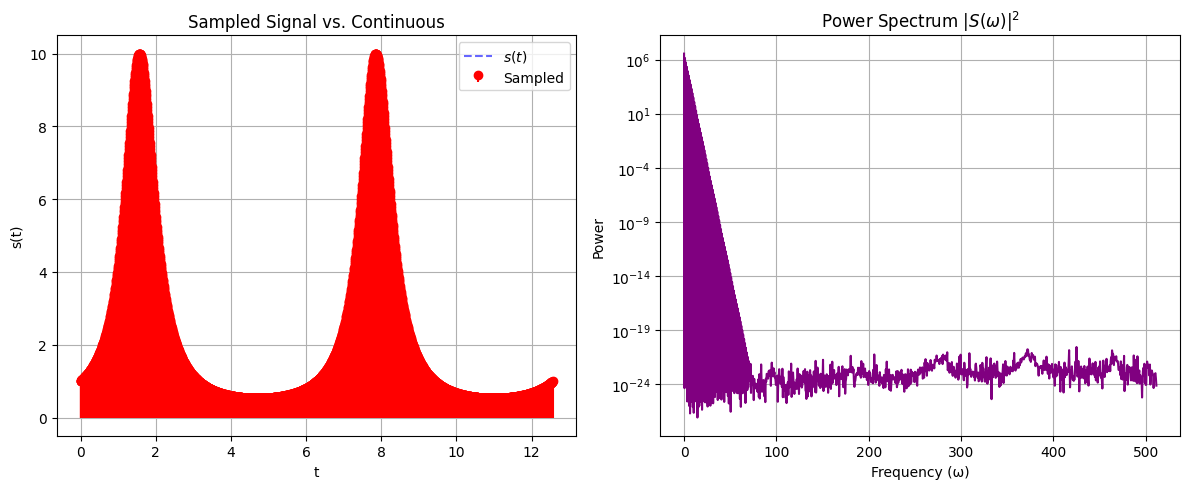

In [45]:
t_cont = np.linspace(0, t_max, 5 * N)
y1_cont = pureSignal(t_cont)

plt.figure(figsize=(12, 5))

# Sampled vs Continuous
plt.subplot(1, 2, 1)
plt.plot(t_cont, y1_cont, linestyle="dashed", color="blue", alpha=0.6, label=r'$s(t)$')
plt.stem(t, y, basefmt=" ", linefmt='r-', markerfmt='ro', label="Sampled")
plt.title("Sampled Signal vs. Continuous")
plt.xlabel("t")
plt.ylabel("s(t)")
plt.legend()
plt.grid(True)

# c)
# --- Second subplot: Power Spectrum ---
plt.subplot(1, 2, 2)
plt.semilogy(freqs[:N//2], power_spectrum[:N//2], color='purple')
plt.title("Power Spectrum $|S(\\omega)|^2$")
plt.xlabel("Frequency (ω)")
plt.ylabel("Power")
plt.grid(True)


plt.tight_layout()
plt.show()

<span style="color: green">
That's a weird looking graph on the right, im not quite sure why we have a massive triangle shape on the lower frequency but my guess is that this comes from the function itself like the expansion suggests, I'm just worried about the huge drop it's 30 orders of maginitude, and that seems excessive to me. let´s do d) and see if what the autocorrelation function gives. If is way off then maybe I should just use existing packages for DTF in this case
</span>

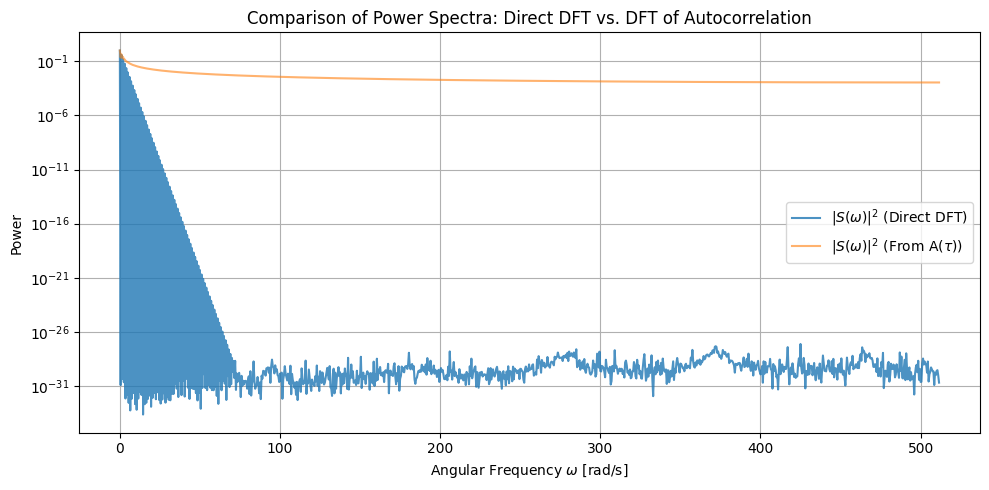

In [46]:
# d)

# Compute autocorrelation using numpy
autocorr = np.correlate(y, y, mode='full')
autocorr_centered = autocorr[N-1:] / np.max(autocorr)  # take second half, normalized

# DFT of autocorrelation
Y_auto = DFT(autocorr_centered, np.zeros(N, dtype=complex))
power_from_autocorr = np.abs(Y_auto) # no need for power as the power spectrum comes from the F(|A(tau)|)

# Compare to original power spectrum
Y_direct = DFT(y, np.zeros(N, dtype=complex))
power_direct = np.abs(Y_direct) ** 2

#normalize
power_direct /= np.max(power_direct)
power_from_autocorr /= np.max(power_from_autocorr)


plt.figure(figsize=(10, 5))
plt.semilogy(freqs[:N//2], power_direct[:N//2], label=r"$|S(\omega)|^2$ (Direct DFT)", alpha=0.8)
plt.semilogy(freqs[:N//2], power_from_autocorr[:N//2], label=r"$|S(\omega)|^2$ (From A($\tau$))", alpha=0.6)
plt.title("Comparison of Power Spectra: Direct DFT vs. DFT of Autocorrelation")
plt.xlabel(r"Angular Frequency $\omega$ [rad/s]")
plt.ylabel("Power")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


<span style="color: green">
Yeah, that seems awfully  far away from the actually value, I want to try this with the np.fft.fft() function to see if that helps
</span>

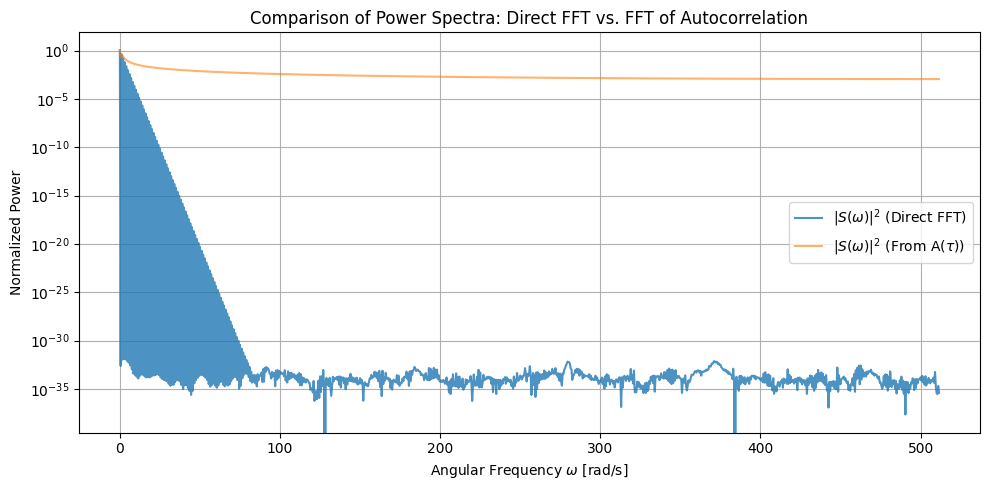

In [47]:
from numpy.fft import fft, fftfreq

N = 2048
t_max = 4 * np.pi
t = np.linspace(0, t_max, N, endpoint=False)
dt = t[1] - t[0]
freqs = fftfreq(N, d=dt) * 2 * np.pi


Y_direct = fft(y)
power_direct = np.abs(Y_direct) ** 2


autocorr = np.correlate(y, y, mode='full')
autocorr_centered = autocorr[N-1:] / N  # Normalized

Y_auto = fft(autocorr_centered)
power_from_autocorr = np.abs(Y_auto)

# Normalize both for comparison
power_direct /= np.max(power_direct)
power_from_autocorr /= np.max(power_from_autocorr)

plt.figure(figsize=(10, 5))
plt.semilogy(freqs[:N//2], power_direct[:N//2], label=r"$|S(\omega)|^2$ (Direct FFT)", alpha=0.8)
plt.semilogy(freqs[:N//2], power_from_autocorr[:N//2], label=r"$|S(\omega)|^2$ (From A($\tau$))", alpha=0.6)
plt.title("Comparison of Power Spectra: Direct FFT vs. FFT of Autocorrelation")
plt.xlabel(r"Angular Frequency $\omega$ [rad/s]")
plt.ylabel("Normalized Power")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
